<a href="https://colab.research.google.com/github/mohd-faizy/Lib_Pandas/blob/master/02_Pandas_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Time Series Analysis on the AAPL/MSFT Stock Index__

In [ ]:
pip install Quandl

In [ ]:
import quandl
import pandas as pd
quandl.ApiConfig.api_key='your_key'

# Retrieve Apple data
apple = quandl.get('WIKI/AAPL')

# Retrieve the MSFT data
ms = quandl.get('WIKI/MSFT')

In [ ]:
%matplotlib inline

In [ ]:
ms.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09
1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08
1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08
1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07
1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07


In [ ]:
apple.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


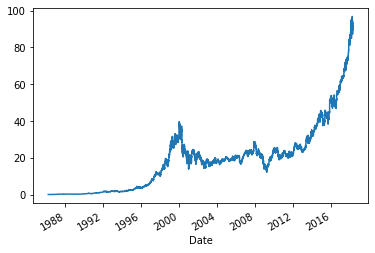

In [ ]:
ms['Adj. Close'].plot() # Microsoft adjusted close price

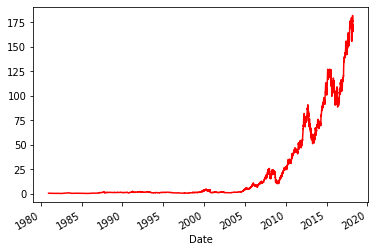

In [ ]:
apple['Adj. Close'].plot(color='red') # Applle adjusted close price

In [ ]:
ms.index # The index in the date-time index

DatetimeIndex(['1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18',
               '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24',
               '1986-03-25', '1986-03-26',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=8076, freq=None)

In [ ]:
apple.index # The index in the date-time index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=9400, freq=None)

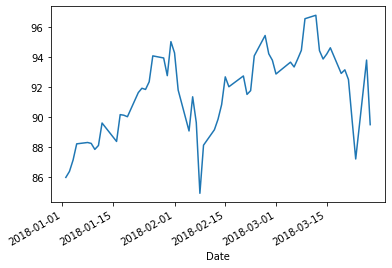

In [ ]:
ms['2018']['Adj. Close'].plot()

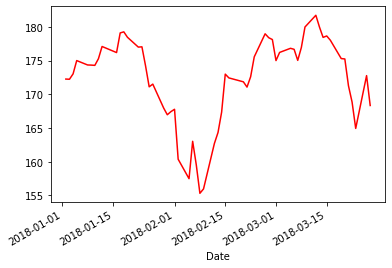

In [ ]:
apple['2018']['Adj. Close'].plot(color='red')

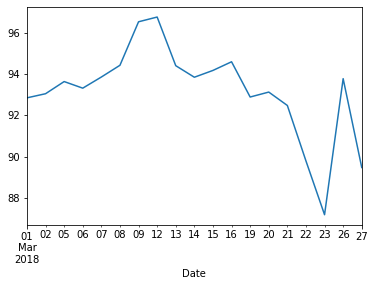

In [ ]:
ms['2018-03']['Adj. Close'].plot()

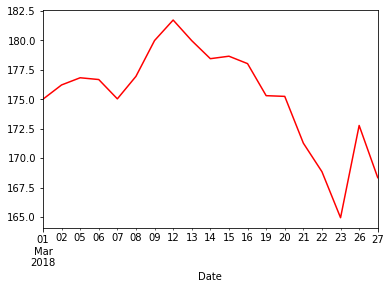

In [ ]:
apple['2018-03']['Adj. Close'].plot(color='red')

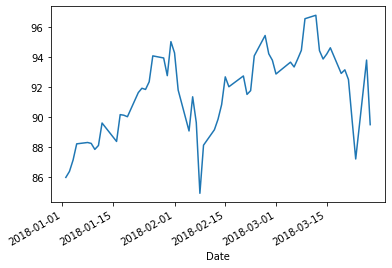

In [ ]:
ms.loc['2018-01-01' : '2018-03-31' ]['Adj. Close'].plot()

In [ ]:
ms_price = ms[['Adj. Close']]
apple_price = apple[['Adj. Close']]

ms_price.rename(columns = {'Adj. Close':'MSFT'}, inplace = True)
apple_price.rename(columns = {'Adj. Close':'AAPL'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
both_stocks = ms_price.join(apple_price, how='inner')

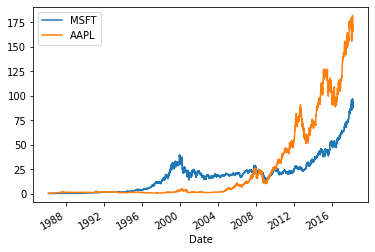

In [ ]:
both_stocks.plot()

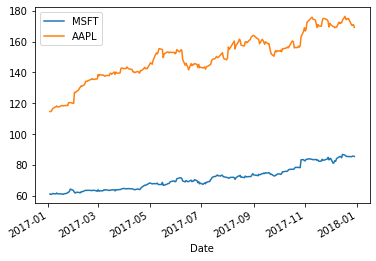

In [ ]:
both_stocks.loc['2017'].plot()

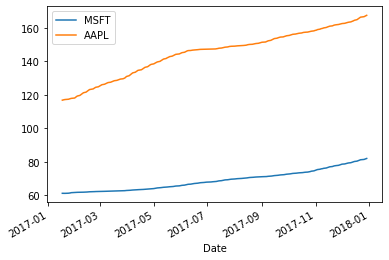

In [ ]:
both_stocks['2017'].rolling(min_periods=10, window=60, center=False).mean().plot()

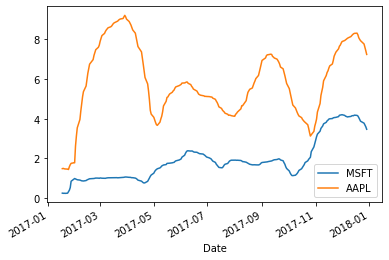

In [ ]:
both_stocks['2017'].rolling(min_periods=10, window=60, center=False).std().plot()